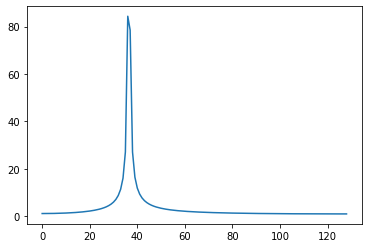

In [5]:
import matplotlib.pyplot as plt
import numpy as np

N = 256
f = 570
fs = 4e3
t_n = np.arange(N)/fs
xt = np.cos(2*np.pi*f*t_n)

plt.figure(1)
plt.plot(np.abs(np.fft.rfft(xt)));

<function matplotlib.pyplot.legend(*args, **kwargs)>

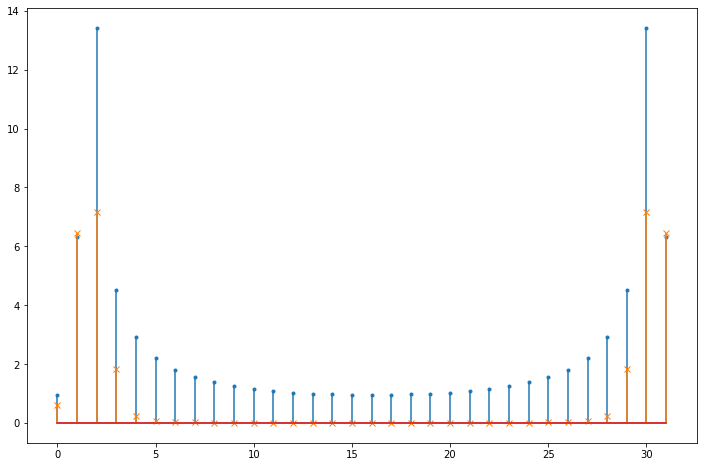

In [11]:
import scipy.signal as sig

# HANN-vindu

# Gir ikkje bedre presisjon, reduserer styrkegraden, 

N = 32
n = np.arange(N)
xn = np.cos(np.pi/10*n)

wn = 0.5 -0.5*np.cos(2*np.pi*n/N)

xn_win = xn*wn

Xm = np.fft.fft(xn);
Xm_win = np.fft.fft(xn_win)

plt.figure(figsize=(12,8))
plt.stem(np.abs(Xm),markerfmt=".", label="Uten Vindu")
plt.stem(np.abs(Xm_win),markerfmt="xC1", linefmt="C1", label="Med Vindu")
plt.legend

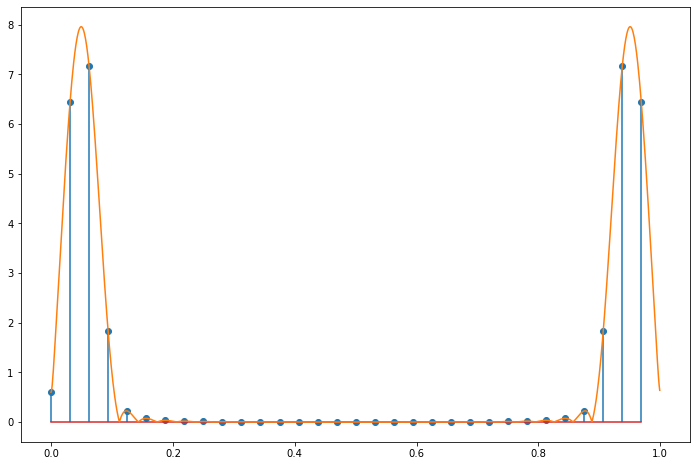

In [31]:
# Zero padding

N = 32
fs = 32
paddingFactor = 32

f_n = np.arange(N)/fs
f_padded = np.arange((paddingFactor*N))/fs/paddingFactor

n = np.arange(N)
xn = np.cos(np.pi/10*n)

wn = 0.5 -0.5*np.cos(2*np.pi*n/N)

xn_win = xn*wn

xn_padded = np.zeros(N*paddingFactor)
xn_padded[:N] = xn_win

# Calculate DFT
Xm = np.fft.fft(xn_win)
Xm_padded = np.fft.fft(xn_padded)

plt.figure(figsize=(12,8))
plt.stem(f_n,np.abs(Xm))
plt.plot(f_padded,np.abs(Xm_padded),"C1")


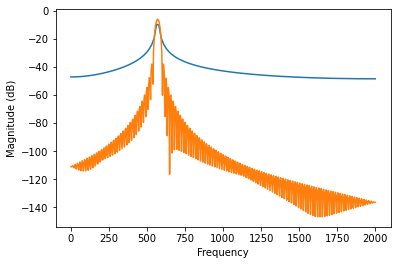

In [33]:
import scipy.signal as sig

f = 570
f_s = 4000

N = 256
n = np.arange(N)

xn = np.cos(2*np.pi*f/f_s*n);

plt.figure()
plt.magnitude_spectrum(xn,
                       Fs=f_s,
                       window=np.ones(N),
                       scale='dB'
                       );
plt.magnitude_spectrum(xn,
                       Fs=f_s,
                       window=sig.windows.hann(N),
                       pad_to=1024,
                       scale='dB'
                       );
